# K-Means Clustering Algorithm:
The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like.\
The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
Each point is closer to its own cluster center than to other cluster centers.

**K-Means clustering is Limited to linear (Flat) data:** \
The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical k-means approach:

Importing the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph

from sklearn.datasets import make_moons

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score


In [2]:
X, y = make_moons(n_samples=500, noise=.08)

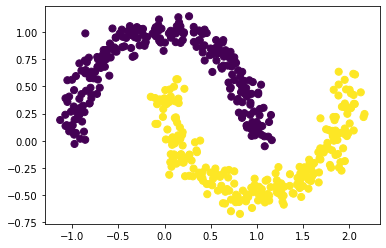

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.show()

we will set the **init** parameter with **k-means++** which selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

**n_init=10** is basically the number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

**max_iter=300** is the maximum number of iterations of the k-means algorithm for a single run.



In [14]:
km = KMeans( n_clusters=2, n_init=10, max_iter=300, random_state=0)
y_predict = km.fit_predict(X)

**Visualizig Results:**

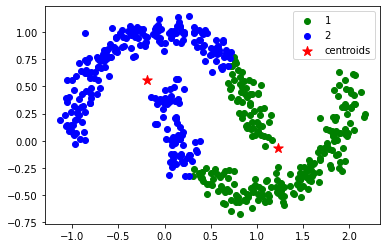

In [15]:
plt.scatter( X[y_predict == 0, 0], X[y_predict == 0, 1], c='g', label='1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], c='b', label='2')
# Centroids
plt.scatter( km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, marker='*', c='r', label='centroids')
plt.legend()
plt.show()

The prediction indeed is poor where the algorithm assumed the data is spherical and the data was clustered by the distance from the centroids.

**Clustering Metrics:**
* The **Silhouette Score** ais used to measure the separation distance between clusters. It displays a measure of how close each point in a cluster is to points in the neighbouring clusters.

  The Silhouette Score is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b).
n is the distance between each sample and the nearest cluster that the sample is not a part of while i is the mean distance within each cluster. \
    *A Silhouette Score can range from zero to 1, where 1 is a perfect seperation of clusters.*



* The **Adjusted Rand index** computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
The raw RI score is then “adjusted for chance” into the ARI score.

In [17]:
silhouette=silhouette_score(X, y_predict, random_state=42)
print(silhouette)

0.485710860171907


In [18]:
ad_rand=adjusted_rand_score(y, y_predict)
print(ad_rand)

0.22122492663790186


___
### Solving Problem Using KNN_graph:

1) calculate the graph representation of data as an **adjacency** matrix using the nearest neighbor graph. \
    **k-nearest neighbors graph** treats every data point as a node in a graph. An edge is then drawn from each node to its k nearest neighbors in the original space.
    
2) We will calculate our **Degree** matrix which is a diagonal, where the degree of a node is how many edges connected to it.


3) We will calculate our **Graph Laplacian** matrix which is basically the subtraction of the adjacency matrix from our degree matrix.

4) We calculate the **Eigen Values and Vectors** from our Laplacian matrix.

5) We **sort** our eigen values and vectors based on eigen values then the vectors associated with those eigenvalues contain information on how to segment the nodes.

In [19]:
from sklearn.neighbors import kneighbors_graph
import numpy as np

# use the nearest neighbor graph as our adjacency matrix
A = kneighbors_graph(X, n_neighbors=10).toarray()

# create the Degree matrix
D = np.diag(A.sum(axis=1))

# create the graph laplacian
L = D-A

# find the eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)

# sort
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

target_vec=vecs[:,1] > 0



In [20]:
km = KMeans(n_clusters=2, random_state=42)
y_predict = km.fit_predict(target_vec.reshape(-1,1))

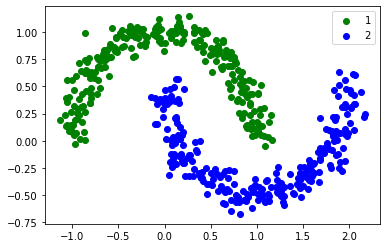

In [22]:
plt.scatter( X[y_predict == 0, 0], X[y_predict == 0, 1], c='g', label='1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], c='b', label='2')

plt.legend()
plt.show()

**Using Clustering metrics:**

In [23]:
silhouette=silhouette_score(X, y_predict, random_state=42)
print(silhouette)

0.32232410500942027


Indeed our Silhouette_score dropped in this clustering since our clusters are closer to each other.

In [24]:
ad_rand=adjusted_rand_score(y, y_predict)
print(ad_rand)

1.0


# Algorithm for detecting non-flat data:


## DBSCAN:
DBSCAN is a density based algorithm that's used mainely to detect outliers, it uses the idea of core, boarder and outlier points


# Ward hierarchical clustering
Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
